In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import torch
import dgl
import os
import numpy as np

In [2]:
os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

In [8]:
g_mat = np.random.randint(0, 2, (10, 10))
g_mat

array([[1, 1, 1, 0, 0, 1, 1, 0, 1, 1],
       [1, 0, 0, 1, 1, 0, 0, 1, 0, 0],
       [0, 1, 0, 1, 1, 1, 0, 1, 0, 1],
       [1, 0, 0, 1, 0, 0, 1, 0, 1, 0],
       [0, 0, 1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 1, 0, 0, 1, 0, 1, 0, 0],
       [1, 0, 0, 1, 0, 1, 1, 0, 0, 0],
       [1, 1, 0, 0, 0, 1, 1, 1, 1, 1],
       [0, 0, 0, 1, 1, 1, 1, 1, 0, 0]])

In [9]:
nx.from_numpy_array(g_mat)

In [12]:
g = nx.from_numpy_matrix(g_mat)

In [15]:
dig = nx.DiGraph(g)

In [17]:
pr = nx.pagerank(dig, alpha=0.85)

In [5]:
N = 100  # number of nodes
DAMP = 0.85  # damping factor
K = 10  # number of iterations


In [10]:
help(nx.erdos_renyi_graph)

Help on function gnp_random_graph in module networkx.generators.random_graphs:

gnp_random_graph(n, p, seed=None, directed=False)
    Returns a $G_{n,p}$ random graph, also known as an Erdős-Rényi graph
    or a binomial graph.
    
    The $G_{n,p}$ model chooses each of the possible edges with probability $p$.
    
    Parameters
    ----------
    n : int
        The number of nodes.
    p : float
        Probability for edge creation.
    seed : integer, random_state, or None (default)
        Indicator of random number generation state.
        See :ref:`Randomness<randomness>`.
    directed : bool, optional (default=False)
        If True, this function returns a directed graph.
    
    See Also
    --------
    fast_gnp_random_graph
    
    Notes
    -----
    This algorithm [2]_ runs in $O(n^2)$ time.  For sparse graphs (that is, for
    small values of $p$), :func:`fast_gnp_random_graph` is a faster algorithm.
    
    :func:`binomial_graph` and :func:`erdos_renyi_graph` are

In [7]:
g = nx.erdos_renyi_graph(N, 0.1)
g

In [11]:
help(dgl.DGLGraph)

Help on class DGLHeteroGraph in module dgl.heterograph:

class DGLHeteroGraph(builtins.object)
 |  DGLHeteroGraph(gidx=[], ntypes=['_N'], etypes=['_E'], node_frames=None, edge_frames=None, **deprecate_kwargs)
 |  
 |  Class for storing graph structure and node/edge feature data.
 |  
 |  There are a few ways to create a DGLGraph:
 |  
 |  * To create a homogeneous graph from Tensor data, use :func:`dgl.graph`.
 |  * To create a heterogeneous graph from Tensor data, use :func:`dgl.heterograph`.
 |  * To create a graph from other data sources, use ``dgl.*`` create ops. See
 |    :ref:`api-graph-create-ops`.
 |  
 |  Read the user guide chapter :ref:`guide-graph` for an in-depth explanation about its
 |  usage.
 |  
 |  Methods defined here:
 |  
 |  __contains__(self, vid)
 |      **DEPRECATED**: please directly call :func:`has_nodes`.
 |  
 |  __copy__(self)
 |      Shallow copy implementation.
 |  
 |  __getitem__(self, key)
 |      Return the relation slice of this graph.
 |      
 | 

In [8]:
g = dgl.DGLGraph(g)
g

/chj/conda_store/envs/nlp_task/lib/python3.7/site-packages/dgl/base.py:45: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  return warnings.warn(message, category=category, stacklevel=1)


Graph(num_nodes=100, num_edges=992,
      ndata_schemes={}
      edata_schemes={})

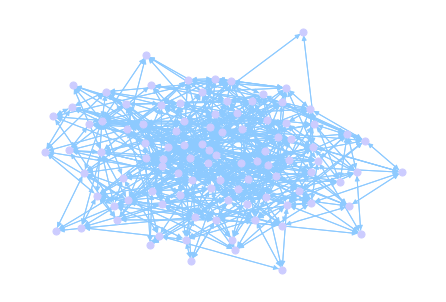

In [19]:
nx.draw(g.to_networkx(), node_size=50, node_color=[[204/255, 204/255, 255/255]], edge_color=[[141/255, 202/255, 255/255]])
plt.show()

In [78]:
g.ndata['pv'] = torch.ones(N) / N
g.ndata['deg'] = g.out_degrees(g.nodes()).float()

In [79]:
g.out_degrees(g.nodes())

tensor([ 5, 16,  7,  5, 10,  9, 10, 16, 12, 17, 13,  7,  6, 13, 10,  9, 14, 17,
        14, 16, 10,  7,  9, 12, 11, 11, 11, 11, 13,  8, 11, 10,  9,  8,  9,  4,
        11,  8, 13, 12, 13,  2,  7,  7, 11, 14,  9, 11,  7, 12, 13,  7,  7,  7,
         9, 10,  9,  5,  6,  5,  5,  8,  9,  5,  5, 18, 14,  6, 13, 18,  9, 10,
        10, 10, 10, 11, 10, 11,  9, 11, 10,  5, 12,  8,  4, 16, 12, 12,  8, 11,
        14, 11, 11,  5,  6, 11,  9, 10, 11,  9])

In [80]:
g.nodes()

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
        72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
        90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [81]:
def pagerank_message_func(edges):
    return {'pv': edges.src['pv'] / edges.src['deg']}

In [82]:
def pagerank_reduce_func(nodes):
    print(nodes)
    msgs = torch.sum(nodes.mailbox['pv'], dim=1)
    pv = (1 - DAMP) / N + DAMP * msgs
    return {'pv': pv}

In [70]:
g.update_all(pagerank_message_func, pagerank_reduce_func)
# g.update_all()

In [71]:
def pagerank_naive(g):
    for u, v in zip(*g.edges()):
        g.apply_edges(pagerank_message_func, (u, v))
    for v in g.nodes():
        g.apply_edges(pagerank_reduce_func, v)
        
def pagerank_batch(g):
    g.send(g.edges())
    g.recv(g.nodes())

In [130]:
import dgl.function as fn

def pagerank(g):
    g.ndata['pv'] = g.ndata['pv'] / g.ndata['deg']
    
    g.update_all(message_func=fn.copy_src(src='pv', out='m'), 
                 reduce_func=fn.sum(msg='m', out='m_sum'))
    
    g.ndata['pv'] = (1 - DAMP) / N + DAMP * g.ndata['m_sum']

In [131]:
pagerank(g)

In [132]:
g.ndata['pv']

tensor([0.0058, 0.0154, 0.0075, 0.0058, 0.0101, 0.0092, 0.0099, 0.0151, 0.0117,
        0.0159, 0.0125, 0.0076, 0.0066, 0.0124, 0.0101, 0.0090, 0.0136, 0.0160,
        0.0132, 0.0152, 0.0100, 0.0074, 0.0093, 0.0119, 0.0108, 0.0107, 0.0108,
        0.0110, 0.0132, 0.0082, 0.0106, 0.0100, 0.0094, 0.0089, 0.0092, 0.0049,
        0.0107, 0.0082, 0.0127, 0.0120, 0.0128, 0.0033, 0.0076, 0.0075, 0.0107,
        0.0137, 0.0094, 0.0111, 0.0074, 0.0121, 0.0127, 0.0075, 0.0077, 0.0074,
        0.0093, 0.0105, 0.0091, 0.0057, 0.0070, 0.0058, 0.0058, 0.0084, 0.0089,
        0.0058, 0.0058, 0.0170, 0.0135, 0.0066, 0.0126, 0.0168, 0.0090, 0.0099,
        0.0099, 0.0099, 0.0098, 0.0107, 0.0102, 0.0111, 0.0092, 0.0109, 0.0102,
        0.0057, 0.0117, 0.0085, 0.0050, 0.0153, 0.0118, 0.0119, 0.0086, 0.0108,
        0.0135, 0.0108, 0.0111, 0.0056, 0.0067, 0.0109, 0.0091, 0.0099, 0.0107,
        0.0093])

In [2]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

In [6]:
wnl.lemmatize('driving'.lower(), 'n')

'driving'

In [7]:
help(wnl.lemmatize)

Help on method lemmatize in module nltk.stem.wordnet:

lemmatize(word: str, pos: str = 'n') -> str method of nltk.stem.wordnet.WordNetLemmatizer instance
    Lemmatize `word` using WordNet's built-in morphy function.
    Returns the input word unchanged if it cannot be found in WordNet.
    
    :param word: The input word to lemmatize.
    :type word: str
    :param pos: The Part Of Speech tag. Valid options are `"n"` for nouns,
        `"v"` for verbs, `"a"` for adjectives, `"r"` for adverbs and `"s"`
        for satellite adjectives.
    :param pos: str
    :return: The lemma of `word`, for the given `pos`.



In [8]:
import pickle as pkl
with open('n2v_cate_sims.pkl', 'rb') as fin:
    cat_sims = pkl.load(fin)

In [10]:
{k: [item[0] for item in v] for k, v in cat_sims.items()}

{'government': ['country',
  'official',
  'spokesman',
  'report',
  'president',
  'effort',
  'secretary',
  'minister',
  'organization',
  'afp',
  'election',
  'leader',
  'sign',
  'nation',
  'security',
  'agency',
  'call',
  'sept',
  'part',
  'november',
  'region',
  'reshuffle',
  'mandate',
  'meeting',
  'north',
  'coalition',
  'capital',
  'quot',
  'rejection',
  'southeast',
  'month',
  'reuters',
  'province',
  'october',
  'press',
  'plan',
  'authority',
  'nov',
  'friday',
  'order',
  'week',
  'talk',
  'refuge',
  'news',
  'union',
  'office',
  'crisis',
  'foreign',
  'monday',
  'united',
  'need',
  'colonel',
  'statement',
  'move',
  'aug',
  'decade',
  'iraq',
  'washington',
  'policy',
  'croat',
  'terrorism',
  'proposal',
  'weapon',
  'member',
  'colonial',
  'yesterday',
  'january',
  'threat',
  'thursday',
  'tie',
  'worker',
  'deputy',
  'visit',
  'attack',
  'department',
  'putin',
  'trade',
  'regime',
  'commitment',
  'co

In [26]:
import numpy as np

In [22]:
import torch
a = torch.load('/chj/dev/lianxiaolei/LOTClass/datasets/agnews/category_vocab.pt')
a

{0: array([ 2231,  2110,  2406,  6867, 10605,  5239,  3757,  3447, 22410,
         2343,  2390,  2473,  2704,  4614,  3212,  2157,  3323,  6939,
         2976,  3072,  2217,  2332,  3842,  2283,  6056,  4657,  2533,
         2610,  4239,  5166,  2036,  3222,  2111,  4884,  3691, 18629,
         2749,  4410,  2457,  3003,  3761,  3639,  3099,  9837,  2548,
         2162,  2160,  6372,  4584,  4034, 20864,  2375,  2874,  4879,
         4721,  2149,  6831,  4559,  4895,  2880,  2172, 10738,  8396,
         3519,  4883,  2597,  3627,  5768, 26489,  2933, 25298,  2983,
         7306,  7610,  4574]),
 1: array([ 2998,  2399,  4368,  7419,  6482,  2208,  2739,  5188, 10978,
         4715,  2374,  3346,  3455,  2840,  3868,  3598,  2694,  3873,
         4013,  2811,  2136,  2417,  2188,  3016,  5465,  9489,  3045,
         9727,  4386,  2175,  7230,  3966,  3608,  2867,  8362,  3539,
         2780,  7576,  5093,  2252,  2630,  7850,  2751,  2225,  4361,
         4438,  6278,  3565,  5088,  389

In [24]:
type(a[0])

numpy.ndarray

In [42]:
with open('n2v_cate_sims_agnews.pkl', 'rb') as fin:
    dic = pkl.load(fin)
dic

{'politics': [['tension', 0.8971363306045532],
  ['personnel', 0.8825752139091492],
  ['style', 0.8620188236236572],
  ['leaders', 0.857577919960022],
  ['fight', 0.8542557954788208],
  ['school', 0.8454718589782715],
  ['threat', 0.8417034149169922],
  ['weekend', 0.8352767825126648],
  ['stay', 0.8344505429267883],
  ['response', 0.8317400813102722],
  ['draft', 0.8299174308776855],
  ['attempt', 0.829717755317688],
  ['flag', 0.8244023323059082],
  ['moment', 0.8197098970413208],
  ['sept', 0.8189804553985596],
  ['reporters', 0.8178490996360779],
  ['dec', 0.8154200315475464],
  ['scare', 0.8147599101066589],
  ['unity', 0.8140192627906799],
  ['outcome', 0.8133175373077393],
  ['businessman', 0.8123329281806946],
  ['mourners', 0.8111353516578674],
  ['protests', 0.8110515475273132],
  ['amid', 0.8096731305122375],
  ['dialogue', 0.8096408843994141],
  ['citizens', 0.8094082474708557],
  ['trouble', 0.8091041445732117],
  ['italian', 0.8089165687561035],
  ['leadership', 0.8082014

In [45]:
dic = {'government': ['democratic', 'xinhuanet', 'threat', 'fight', 'southeast', 'continent', 'britain', 'khartoum', 'string', 'violence', 'sudanese', 'foreign', 'united', 'warning', 'standoff', 'deadline', 'week', 'reuters', 'role', 'aug', 'secretary', 'allawi', 'worker', 'control', 'electricity', 'month', 'organization', 'movement', 'progress', 'delegation', 'help', 'lebanon', 'siege', 'presence', 'destruction', 'quot', 'muslim', 'situation', 'spokesman', 'conflict', 'baghdad', 'liberation', 'congo', 'interior', 'aid', 'truce', 'ministry', 'measure', 'african', 'permission', 'terrorism', 'chief', 'oil', 'dec', 'headquarters', 'election', 'resistance', 'concern', 'act', 'move', 'cease', 'statement', 'support', 'darfur', 'resolution', 'sign', 'army', 'leadership', 'nairobi', 'criticism', 'corruption', 'population', 'reform', 'abuja', 'province', 'iraqi', 'islamic', 'cabinet', 'republic', 'security', 'relief', 'affair', 'british', 'office', 'kuala', 'proposal'],
       'sport': ['quarterback', 'career', 'club', 'football', 'basketball', 'coach', 'cbc', 'team', 'championship', 'trophy', 'injury', 'cup', 'stadium', 'ncaa', 'opener', 'oklahoma', 'minnesota', 'captain', 'kansa', 'bowl', 'title', 'night', 'ohio', 'player', 'series', 'uefa', 'receiver', 'viking', 'abc', 'baseball', 'soccer', 'match', 'draw', 'dolphin', 'yankee', 'agent', 'college', 'golf', 'nba', 'champion', 'olympic', 'greece', 'association', 'university', 'espn', 'nhl', 'tournament', 'massachusetts', 'goal', 'nfl', 'bayern', 'sox', 'manager', 'tonight', 'course', 'michigan', 'practice', 'form', 'network', 'clash', 'big', 'fla', 'one', 'award', 'status', 'medal', 'tomorrow', 'minute', 'mph', 'event', 'patriot', 'usa', 'lead', 'doping', 'nascar', 'morning', 'crowd', 'veteran', 'american', 'italy', 'brother', 'norway', 'suspension', 'game', 'contract', 'extension', 'texas', 'munich', 'weekend', 'netherlands', 'challenge', 'associated', 'bangladesh', 'arrival', 'defeat', 'zealand', 'switzerland', 'fed', 'protest', 'half'],
       'business': ['customer', 'company', 'sector', 'inc', 'strategy', 'technology', 'market', 'siebel', 'provider', 'service', 'software', 'computer', 'revenue', 'utility', 'firm', 'corporation', 'global', 'management', 'ibm', 'executive', 'marketing', 'commerce', 'portfolio', 'push', 'distributor', 'idg', 'texas', 'analyst', 'frankfurt', 'investment', 'consumer', 'sap', 'ltd', 'system', 'profile', 'idea', 'part', 'research', 'auto', 'product', 'quote', 'payment', 'quarter', 'chairman', 'boost', 'publishing', 'storage', 'carmaker', 'collaboration', 'performance', 'public', 'enterprise', 'expansion', 'subscription', 'level', 'nasdaq', 'growth', 'lenovo', 'ebay', 'user', 'presence', 'chief', 'component', 'backup', 'llc', 'addition', 'distribution', 'group', 'parcel', 'activity', 'traffic', 'com', 'speech', 'wireless', 'vendor', 'application', 'tech', 'washingtonpost', 'acquisition', 'medium', 'guidance', 'usatoday', 'depot', 'maccentral', 'universal', 'shanghai', 'year', 'crm', 'ability', 'exchange', 'database', 'interface', 'subsidiary', 'announcement', 'internet', 'telecommunication', 'venture', 'cbs', 'broadband', 'merger'],
       'technology': ['service', 'system', 'idg', 'performance', 'model', 'computer', 'newsfactor', 'business', 'software', 'provider', 'chart', 'commerce', 'licensing', 'architecture', 'pc', 'storage', 'distribution', 'component', 'customer', 'strategy', 'version', 'subscription', 'hardware', 'edition', 'developer', 'backup', 'platform', 'inc', 'application', 'corporation', 'distributor', 'marketing', 'portfolio', 'internet', 'delivery', 'product', 'company', 'middleware', 'intel', 'push', 'solution', 'market', 'linux', 'update', 'ibm', 'management', 'wimax', 'maccentral', 'suite', 'secure', 'enterprise', 'infrastructure', 'interface', 'professional', 'prnewswire', 'database', 'silicon', 'sybase', 'deployment', 'instant', 'infoworld', 'window', 'frankfurt', 'usage', 'emc', 'calif', 'engineering', 'access', 'utility', 'use', 'qualcomm', 'collaboration', 'content', 'roundup', 'flagship', 'vendor', 'addition', 'traffic', 'tool', 'user', 'mail', 'computerworld', 'digital', 'nasdaq', 'medium', 'level', 'crm', 'equipment', 'adobe', 'appliance', 'operating', 'availability', 'instrument', 'microsoft', 'sp', 'firstcall', 'advertisement', 'wireless', 'nyse', 'desktop']}

In [46]:
dic

{'government': ['democratic',
  'xinhuanet',
  'threat',
  'fight',
  'southeast',
  'continent',
  'britain',
  'khartoum',
  'string',
  'violence',
  'sudanese',
  'foreign',
  'united',
  'warning',
  'standoff',
  'deadline',
  'week',
  'reuters',
  'role',
  'aug',
  'secretary',
  'allawi',
  'worker',
  'control',
  'electricity',
  'month',
  'organization',
  'movement',
  'progress',
  'delegation',
  'help',
  'lebanon',
  'siege',
  'presence',
  'destruction',
  'quot',
  'muslim',
  'situation',
  'spokesman',
  'conflict',
  'baghdad',
  'liberation',
  'congo',
  'interior',
  'aid',
  'truce',
  'ministry',
  'measure',
  'african',
  'permission',
  'terrorism',
  'chief',
  'oil',
  'dec',
  'headquarters',
  'election',
  'resistance',
  'concern',
  'act',
  'move',
  'cease',
  'statement',
  'support',
  'darfur',
  'resolution',
  'sign',
  'army',
  'leadership',
  'nairobi',
  'criticism',
  'corruption',
  'population',
  'reform',
  'abuja',
  'province',


In [19]:
from transformers import BertTokenizer

tker = BertTokenizer.from_pretrained('bert-base-uncased')

2022-04-07 16:58:47.249626: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/rh/devtoolset-7/root/usr/lib64:/opt/rh/devtoolset-7/root/usr/lib:/opt/rh/devtoolset-7/root/usr/lib64/dyninst:/opt/rh/devtoolset-7/root/usr/lib/dyninst:/opt/rh/devtoolset-7/root/usr/lib64:/opt/rh/devtoolset-7/root/usr/lib
2022-04-07 16:58:47.249666: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [47]:
tker.convert_tokens_to_ids(dic['government'])

[3537,
 100,
 5081,
 2954,
 4643,
 9983,
 3725,
 100,
 5164,
 4808,
 25603,
 3097,
 2142,
 5432,
 100,
 15117,
 2733,
 26665,
 2535,
 15476,
 3187,
 100,
 7309,
 2491,
 6451,
 3204,
 3029,
 2929,
 5082,
 10656,
 2393,
 8341,
 6859,
 3739,
 6215,
 100,
 5152,
 3663,
 14056,
 4736,
 13952,
 7931,
 9030,
 4592,
 4681,
 18415,
 3757,
 5468,
 3060,
 6656,
 10130,
 2708,
 3514,
 11703,
 4075,
 2602,
 5012,
 5142,
 2552,
 2693,
 13236,
 4861,
 2490,
 100,
 5813,
 3696,
 2390,
 4105,
 21124,
 6256,
 7897,
 2313,
 5290,
 100,
 2874,
 8956,
 5499,
 5239,
 3072,
 3036,
 4335,
 6771,
 2329,
 2436,
 15490,
 6378]

In [51]:
dic_ids = {}
i = 0
for k, v in dic.items():
#     dic_ids.setdefault(i, [])
#     dic_ids[i] = np.array(tker.convert_tokens_to_ids([item[0] for item in dic[k]]))
    dic_ids[i] = np.array([item for item in tker.convert_tokens_to_ids(dic[k]) if item != 100])
    i += 1
dic_ids

{0: array([ 3537,  5081,  2954,  4643,  9983,  3725,  5164,  4808, 25603,
         3097,  2142,  5432, 15117,  2733, 26665,  2535, 15476,  3187,
         7309,  2491,  6451,  3204,  3029,  2929,  5082, 10656,  2393,
         8341,  6859,  3739,  6215,  5152,  3663, 14056,  4736, 13952,
         7931,  9030,  4592,  4681, 18415,  3757,  5468,  3060,  6656,
        10130,  2708,  3514, 11703,  4075,  2602,  5012,  5142,  2552,
         2693, 13236,  4861,  2490,  5813,  3696,  2390,  4105, 21124,
         6256,  7897,  2313,  5290,  2874,  8956,  5499,  5239,  3072,
         3036,  4335,  6771,  2329,  2436, 15490,  6378]),
 1: array([ 9074,  2476,  2252,  2374,  3455,  2873, 13581,  2136,  2528,
         5384,  4544,  2452,  3346,  5803, 16181,  5858,  5135,  2952,
         4605,  2516,  2305,  4058,  2447,  2186,  6663,  8393, 12886,
         5925,  3598,  4715,  2674,  4009, 17801, 17652,  4005,  2267,
         5439,  6452,  3410,  4386,  5483,  2523,  2118, 10978,  7097,
         297

In [52]:
torch.save(dic_ids, '/chj/dev/lianxiaolei/LOTClass/datasets/agnews/category_vocab.pt.bak_oo')

In [36]:
with open('category.dic', 'wb') as fout:
    pkl.dump(dic, fout)

In [58]:
govs = set(dic['government'])
govs

{'abuja',
 'act',
 'affair',
 'african',
 'aid',
 'allawi',
 'army',
 'aug',
 'baghdad',
 'britain',
 'british',
 'cabinet',
 'cease',
 'chief',
 'concern',
 'conflict',
 'congo',
 'continent',
 'control',
 'corruption',
 'criticism',
 'darfur',
 'deadline',
 'dec',
 'delegation',
 'democratic',
 'destruction',
 'election',
 'electricity',
 'fight',
 'foreign',
 'headquarters',
 'help',
 'interior',
 'iraqi',
 'islamic',
 'khartoum',
 'kuala',
 'leadership',
 'lebanon',
 'liberation',
 'measure',
 'ministry',
 'month',
 'move',
 'movement',
 'muslim',
 'nairobi',
 'office',
 'oil',
 'organization',
 'permission',
 'population',
 'presence',
 'progress',
 'proposal',
 'province',
 'quot',
 'reform',
 'relief',
 'republic',
 'resistance',
 'resolution',
 'reuters',
 'role',
 'secretary',
 'security',
 'siege',
 'sign',
 'situation',
 'southeast',
 'spokesman',
 'standoff',
 'statement',
 'string',
 'sudanese',
 'support',
 'terrorism',
 'threat',
 'truce',
 'united',
 'violence',
 'warni

In [59]:
with open('datasets/agnews/train.txt', 'r') as fin:
    text = fin.readlines()

In [62]:
from tqdm import tqdm
import re
def remove_urls (vTEXT):
    vTEXT = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', vTEXT, flags=re.MULTILINE)
    return(vTEXT)

text = [remove_urls(item) for item in tqdm(text)]
text = [re.sub(r'[^\w\s]',' ', item) for item in tqdm(text)]


100%|██████████| 120000/120000 [00:01<00:00, 84762.74it/s]

100%|██████████| 120000/120000 [00:00<00:00, 158611.90it/s]


In [ ]:
for d in tqdm(data):
    d = [i.lower() for i in d.split(' ')]
    if len(govs.intersection(d)) > 0:
        print(govs.intersection(d))